# Linear Regression

- 선형적인 관계를 분석하는 데 사용됨

In [58]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns


data = load_boston()



In [59]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])

df['MEDV'] = data['target'] # 주택의 중앙값

# 이전에 사용했던 데이터들
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV']) # X 데이터와 Y데이터 삽입

In [60]:
model = LinearRegression(n_jobs=1)

- n_jobs: CPU 코어의 사용

In [61]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=1)

In [62]:
pred = model.predict(x_test)

In [63]:
pred[:5]

array([23.44109599, 28.35991345, 14.1383295 , 25.41240264, 25.22503592])

In [64]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'khak!', 'orchid', 'sandybrown', 'greenyellow', 'dodgerblue', 'deepskyblue',
'deeppink', 'crimson', 'salmon', 'rosybrown',' firebrick', 'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate', 'gold', 'arkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 'peru',
'midhighblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato']

In [83]:
def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12) # 이게 좌상단 나타내는 라벨 
    plt.show()

In [84]:
def mse_eval(name_, pred, actual):
    global my_predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)

    print(mse)

    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))

    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

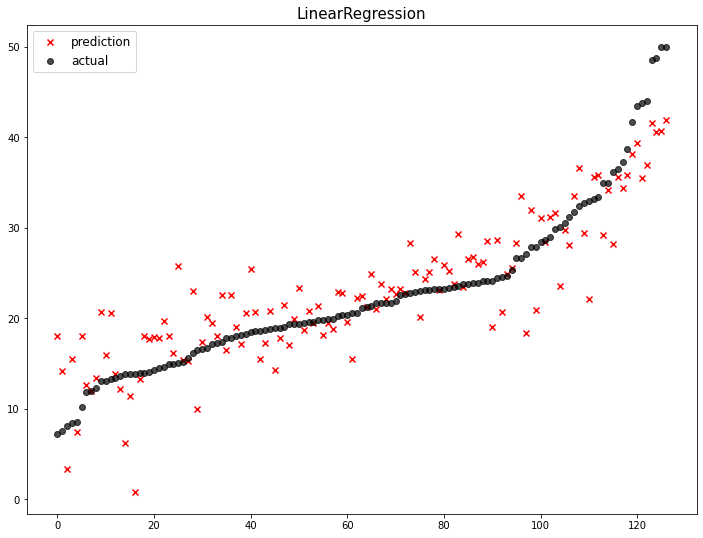

18.678956172737035
              model        mse
0  LinearRegression  18.678956


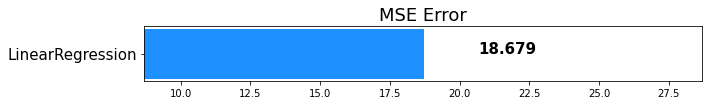

In [85]:
# 검은색은 실제 값, 빨간색은 예측값, 거리가 오차
mse_eval('LinearRegression', pred, y_test)
# 아래 plot은 오차값